# SimpDM imputed results analysis

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import hyperimpute

Read in original data, imputed data, and mask:

In [2]:
simpdm_imputed = {}  
gt = {}
mask = {}

for prop in [0.1, 0.3, 0.5, 0.7]:
    simpdm_imputed[prop] = [] 
    gt[prop] = [] 
    mask[prop] = [] 
    for trial in range(5):
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/SimpDM_imputed_full_unbalanced_misprop_{prop}_trial{trial}.csv", header=None)
        simpdm_imputed[prop].append(df)
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/test_gt_full_misprop_{prop}_imbalanced_trial{trial}.csv", header=None)
        gt[prop].append(df)
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/mask_full_misprop_{prop}_imbalanced_trial{trial}.csv", header=None)
        mask[prop].append(df)

In [3]:
simpdm_imputed[0.3][0].head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.002025,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.0,0.027528,0.000000,0.0
1,0.010832,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.00,0.00,0.0,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0
2,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.02,0.00,0.0,0.031250,0.00,0.00,0.0,0.028539,0.009450,0.0
3,0.028027,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.02,0.00,0.0,0.031250,0.25,0.25,0.0,0.030562,0.000000,0.0
4,0.007491,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.02,0.02,0.0,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0


In [4]:
gt[0.3][0].head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.002025,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.00,0.00,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0
1,0.010832,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.00,0.00,0.0,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0
2,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.02,0.00,0.0,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0
3,0.028027,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.02,0.00,0.0,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0
4,0.007491,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.02,0.02,0.0,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0


In [5]:
mask[0.3][0].head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Read in RMSEs:

In [6]:
all_rmses = {}

for prop in [0.1, 0.3, 0.5, 0.7]:
    with open(f"/work/ts518/sta571/Imbalanced_data/SimpDM/SimpDM_imputed_full_unbalanced_misprop_{prop}_rmse_dict.json", 
              'r') as file:
        rmse = json.load(file)
        all_rmses[prop] = rmse['rmse']

In [7]:
all_rmses

{0.1: '0.0705+-0.0132',
 0.3: '0.0805+-0.0107',
 0.5: '0.0717+-0.0084',
 0.7: '0.0685+-0.0183'}

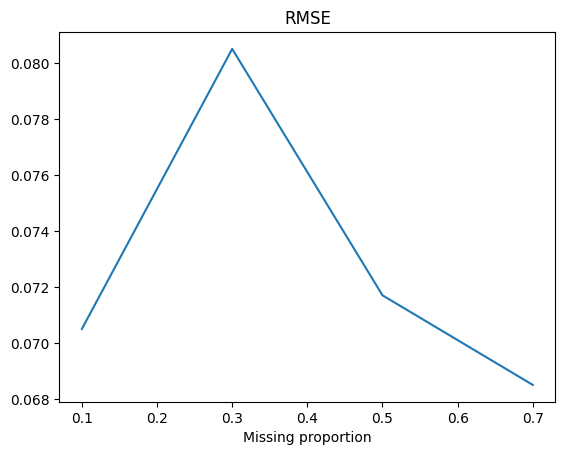

In [15]:
plt.plot(list(all_rmses.keys()), [float(str(v)[:6]) for v in list(all_rmses.values())[0:6]])
plt.title("RMSE")
plt.xlabel("Missing proportion")
plt.show()

In [ ]:
# Compute RMSE for each class
from pathlib import Path
from dataset import load_dataset, mean_std

# Load the dataset to get class labels
train_X, test_X, ori_train_mask, ori_test_mask, train_num, test_num, train_cat_idx, test_cat_idx, train_mask, test_mask, cat_bin_num = load_dataset(dataname, split_idx, mask_type, ratio)

# Load original training data to get class labels
train_df = pd.read_csv(f'datasets/{dataname}/train.csv')
class_labels = train_df.iloc[:, -1].values  # Last column is the target (attack_cat_encode)

# Load imputed data from the last iteration
final_iter = len(results_df) - 1
ckpt_dir = Path(f'ckpt/{dataname}/rate{ratio}/{mask_type}/{split_idx}/{num_trials}_{num_steps}')
imputed_X = np.load(ckpt_dir / f'iter_{final_iter + 1}.npy')

print(f"Loaded imputed data from iteration {final_iter + 1}")
print(f"Shape: train_X={train_X.shape}, imputed_X={imputed_X.shape}")
print(f"Unique classes: {np.unique(class_labels)}")

Loaded imputed data from iteration 2
Shape: train_X=(122738, 63), imputed_X=(122738, 63)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Compute per-class RMSE and MAE
# Normalize the data for fair comparison
mean_X, std_X = mean_std(train_X, train_mask)
std_X = np.where(std_X == 0, 1, std_X)  # Avoid division by zero

# Normalize both true and imputed data
X_true_normalized = (train_X - mean_X) / std_X
imputed_normalized = imputed_X / 2  # The imputed data was scaled by /2 during training

# Get number of numeric columns (before one-hot encoding expansion)
num_cols = train_num.shape[1]

# Get unique classes
unique_classes = np.unique(class_labels)
class_metrics = []

for cls in unique_classes:
    cls_mask = class_labels == cls
    
    # Get the true and imputed values for this class
    true_cls = X_true_normalized[cls_mask]
    imputed_cls = imputed_normalized[cls_mask]
    
    # Calculate difference
    diff = true_cls - imputed_cls
    
    # Calculate RMSE and MAE for this class
    rmse = np.sqrt(np.mean(diff ** 2))
    mae = np.mean(np.abs(diff))
    n_samples = np.sum(cls_mask)
    
    class_metrics.append({
        'class': int(cls),
        'n_samples': n_samples,
        'RMSE': rmse,
        'MAE': mae
    })

class_metrics_df = pd.DataFrame(class_metrics)
print("Per-Class Imputation Metrics:")
display(class_metrics_df)

Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,1405,1.209985,0.267047
1,1,1237,0.465581,0.205984
2,2,8630,0.697728,0.216983
3,3,23432,0.651196,0.249262
4,4,12721,0.538262,0.232921
5,5,27937,0.499551,0.265186
6,6,39194,0.628837,0.238751
7,7,7283,0.379890,0.206578
8,8,809,0.326915,0.199679
9,9,90,0.625178,0.293388


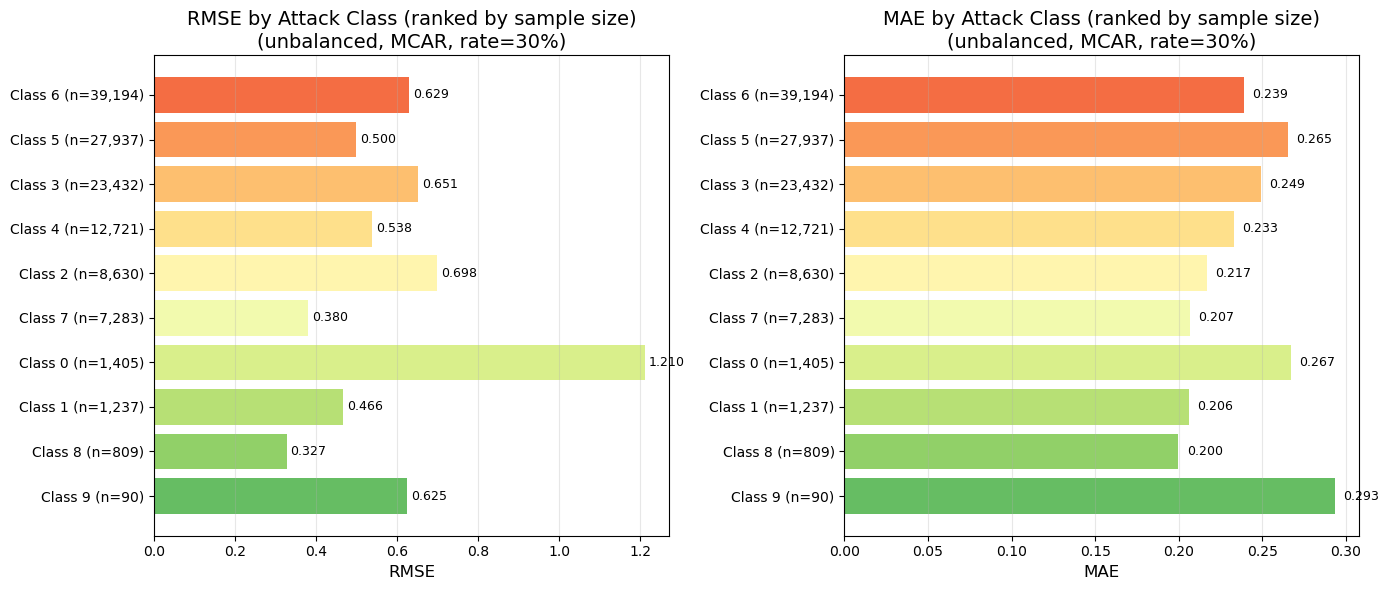


PER-CLASS RMSE SUMMARY (ranked by sample size)
Best class (lowest RMSE):  Class 8 (RMSE=0.3269)
Worst class (highest RMSE): Class 0 (RMSE=1.2100)
Average RMSE across classes: 0.6023

Sample size range: 90 - 39,194


In [ ]:
# Visualize per-class RMSE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sort by sample size (n_samples) for better visualization
class_metrics_df_sorted = class_metrics_df.sort_values('n_samples', ascending=True)

# RMSE by class (ranked by sample size)
ax1 = axes[0]
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(class_metrics_df_sorted)))
bars = ax1.barh(range(len(class_metrics_df_sorted)), class_metrics_df_sorted['RMSE'], color=colors)
ax1.set_yticks(range(len(class_metrics_df_sorted)))
ax1.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(class_metrics_df_sorted['class'], class_metrics_df_sorted['n_samples'])])
ax1.set_xlabel('RMSE', fontsize=12)
ax1.set_title(f'RMSE by Attack Class (ranked by sample size)\n({dataname}, {mask_type}, rate={ratio}%)', fontsize=14)
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels with sample size
for i, (bar, val, n) in enumerate(zip(bars, class_metrics_df_sorted['RMSE'], class_metrics_df_sorted['n_samples'])):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', ha='left', fontsize=9)

# MAE by class (ranked by sample size)
ax2 = axes[1]
bars = ax2.barh(range(len(class_metrics_df_sorted)), class_metrics_df_sorted['MAE'], color=colors)
ax2.set_yticks(range(len(class_metrics_df_sorted)))
ax2.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(class_metrics_df_sorted['class'], class_metrics_df_sorted['n_samples'])])
ax2.set_xlabel('MAE', fontsize=12)
ax2.set_title(f'MAE by Attack Class (ranked by sample size)\n({dataname}, {mask_type}, rate={ratio}%)', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, val) in enumerate(zip(bars, class_metrics_df_sorted['MAE'])):
    ax2.text(val + 0.005, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "=" * 60)
print("PER-CLASS RMSE SUMMARY (ranked by sample size)")
print("=" * 60)
print(f"Best class (lowest RMSE):  Class {int(class_metrics_df.loc[class_metrics_df['RMSE'].idxmin(), 'class'])} (RMSE={class_metrics_df['RMSE'].min():.4f})")
print(f"Worst class (highest RMSE): Class {int(class_metrics_df.loc[class_metrics_df['RMSE'].idxmax(), 'class'])} (RMSE={class_metrics_df['RMSE'].max():.4f})")
print(f"Average RMSE across classes: {class_metrics_df['RMSE'].mean():.4f}")
print(f"\nSample size range: {class_metrics_df['n_samples'].min():,} - {class_metrics_df['n_samples'].max():,}")

In [ ]:
# Compute within-class variance for imputed values vs observed values
# and calculate the variance ratio

# Get the missing mask (1 = observed, 0 = missing)
# train_mask has same shape as train_X (with one-hot encoding)

variance_metrics = []

for cls in unique_classes:
    cls_mask = class_labels == cls
    
    # Get data for this class
    true_cls = X_true_normalized[cls_mask]
    imputed_cls = imputed_normalized[cls_mask]
    mask_cls = train_mask[cls_mask]  # 1 = observed, 0 = missing
    
    # Flatten for variance computation
    true_flat = true_cls.flatten()
    imputed_flat = imputed_cls.flatten()
    mask_flat = mask_cls.flatten()
    
    # Separate imputed positions (where data was missing) and observed positions
    missing_positions = mask_flat == 0
    observed_positions = mask_flat == 1
    
    # Get imputed values (values at positions that were missing)
    imputed_values = imputed_flat[missing_positions]
    
    # Get observed values (original values at positions that were observed)
    observed_values = true_flat[observed_positions]
    
    # Compute variance
    if len(imputed_values) > 1:
        var_imputed = np.var(imputed_values)
    else:
        var_imputed = np.nan
        
    if len(observed_values) > 1:
        var_observed = np.var(observed_values)
    else:
        var_observed = np.nan
    
    # Compute variance ratio (imputed / observed)
    if var_observed > 0:
        var_ratio = var_imputed / var_observed
    else:
        var_ratio = np.nan
    
    n_samples = np.sum(cls_mask)
    n_missing = np.sum(missing_positions)
    n_observed = np.sum(observed_positions)
    
    variance_metrics.append({
        'class': int(cls),
        'n_samples': n_samples,
        'n_missing': n_missing,
        'n_observed': n_observed,
        'var_imputed': var_imputed,
        'var_observed': var_observed,
        'var_ratio': var_ratio
    })

variance_df = pd.DataFrame(variance_metrics)
print("Within-Class Variance Analysis:")
print("=" * 80)
display(variance_df)

print("\n" + "=" * 80)
print("VARIANCE RATIO INTERPRETATION:")
print("=" * 80)
print("Ratio < 1: Imputed values have LESS variance than observed (under-dispersion)")
print("Ratio = 1: Imputed values have SAME variance as observed (ideal)")
print("Ratio > 1: Imputed values have MORE variance than observed (over-dispersion)")
print(f"\nAverage variance ratio across classes: {variance_df['var_ratio'].mean():.4f}")

Within-Class Variance Analysis:


,class,n_samples,n_missing,n_observed,var_imputed,var_observed,var_ratio
0,0,1405,62188,26327,0.752691,3.341559,0.225252
1,1,1237,54584,23347,0.125447,0.565891,0.221680
2,2,8630,380598,163092,0.304106,1.176488,0.258486
3,3,23432,1034386,441830,0.281820,1.088985,0.258792
4,4,12721,561028,240395,0.202472,0.795839,0.254414
5,5,27937,1230111,529920,0.177044,0.698368,0.253511
6,6,39194,1728102,741120,0.285660,0.993728,0.287463
7,7,7283,320897,137932,0.102338,0.404530,0.252980
8,8,809,35776,15191,0.077250,0.334256,0.231109
9,9,90,3970,1700,0.276340,1.098080,0.251657



VARIANCE RATIO INTERPRETATION:
Ratio < 1: Imputed values have LESS variance than observed (under-dispersion)
Ratio = 1: Imputed values have SAME variance as observed (ideal)
Ratio > 1: Imputed values have MORE variance than observed (over-dispersion)

Average variance ratio across classes: 0.2495


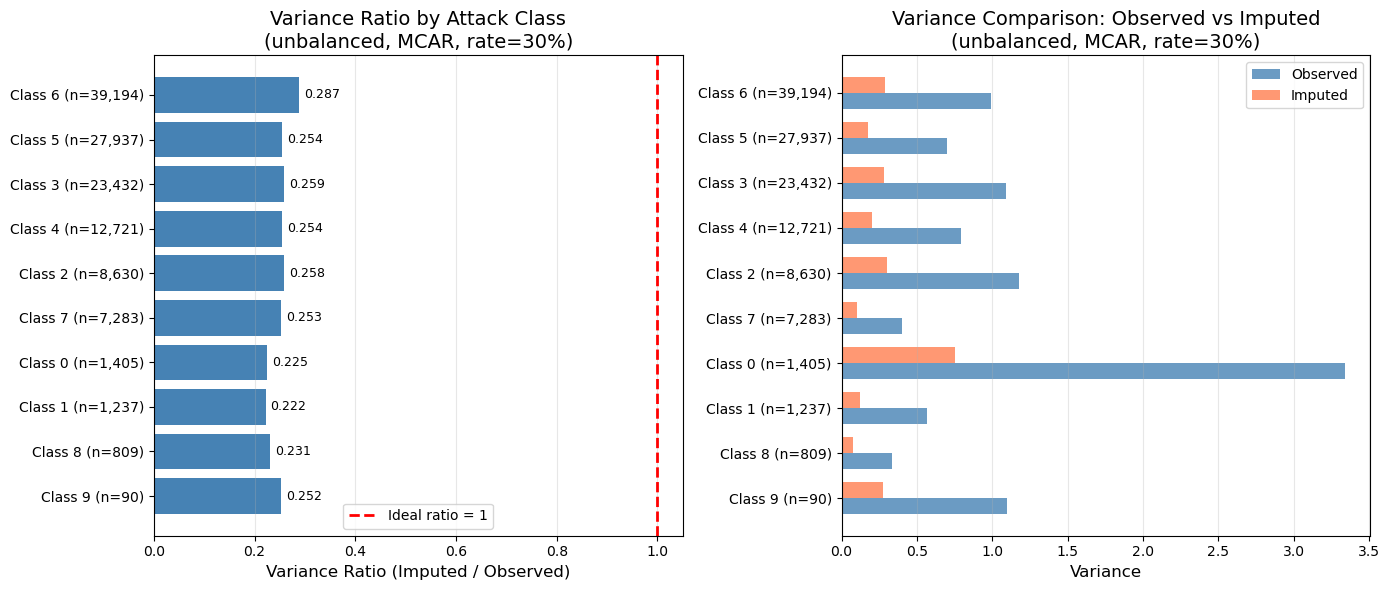


VARIANCE ANALYSIS SUMMARY
All classes have variance ratio < 1 (under-dispersion): True
Classes with ratio < 0.5 (significant under-dispersion): 10 / 10

This indicates the imputation model tends to produce values closer to the mean,
resulting in lower variance compared to the true observed data distribution.


In [ ]:
# Visualize variance ratio by class (ranked by sample size)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sort by sample size
variance_df_sorted = variance_df.sort_values('n_samples', ascending=True)

# Variance ratio by class
ax1 = axes[0]
colors = np.where(variance_df_sorted['var_ratio'] < 1, 'steelblue', 'coral')
bars = ax1.barh(range(len(variance_df_sorted)), variance_df_sorted['var_ratio'], color=colors)
ax1.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Ideal ratio = 1')
ax1.set_yticks(range(len(variance_df_sorted)))
ax1.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(variance_df_sorted['class'], variance_df_sorted['n_samples'])])
ax1.set_xlabel('Variance Ratio (Imputed / Observed)', fontsize=12)
ax1.set_title(f'Variance Ratio by Attack Class\n({dataname}, {mask_type}, rate={ratio}%)', fontsize=14)
ax1.grid(True, alpha=0.3, axis='x')
ax1.legend()

# Add value labels
for i, (bar, val) in enumerate(zip(bars, variance_df_sorted['var_ratio'])):
    ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', ha='left', fontsize=9)

# Compare imputed vs observed variance
ax2 = axes[1]
x = np.arange(len(variance_df_sorted))
width = 0.35

bars1 = ax2.barh(x - width/2, variance_df_sorted['var_observed'], width, label='Observed', color='steelblue', alpha=0.8)
bars2 = ax2.barh(x + width/2, variance_df_sorted['var_imputed'], width, label='Imputed', color='coral', alpha=0.8)
ax2.set_yticks(x)
ax2.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(variance_df_sorted['class'], variance_df_sorted['n_samples'])])
ax2.set_xlabel('Variance', fontsize=12)
ax2.set_title(f'Variance Comparison: Observed vs Imputed\n({dataname}, {mask_type}, rate={ratio}%)', fontsize=14)
ax2.grid(True, alpha=0.3, axis='x')
ax2.legend()

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "=" * 80)
print("VARIANCE ANALYSIS SUMMARY")
print("=" * 80)
print(f"All classes have variance ratio < 1 (under-dispersion): {(variance_df['var_ratio'] < 1).all()}")
print(f"Classes with ratio < 0.5 (significant under-dispersion): {(variance_df['var_ratio'] < 0.5).sum()} / {len(variance_df)}")
print(f"\nThis indicates the imputation model tends to produce values closer to the mean,")
print(f"resulting in lower variance compared to the true observed data distribution.")

In [ ]:
# ============================================================================
# MULTIPLE IMPUTATION WITH RUBIN'S RULES
# Generate k=500 imputed datasets and apply Rubin's combining rules
# ============================================================================

import torch
from model import MLPDiffusion, Model
from diffusion_utils import impute_mask
from tqdm import tqdm

# Configuration for multiple imputation
k_imputations = 100  # Number of imputations (m in Rubin's rules)
num_steps_impute = 10  # Diffusion steps for imputation
hid_dim = 256  # Must match training config
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

print(f"Device: {device}")
print(f"Generating {k_imputations} imputations...")

# Load the trained model from the last iteration
final_iter = len(results_df) - 1
model_path = f'ckpt/{dataname}/rate{ratio}/{mask_type}/{split_idx}/{num_trials}_{num_steps}/{final_iter}/model.pt'
print(f"Loading model from: {model_path}")

Device: cuda:0
Generating 500 imputations...
Loading model from: ckpt/unbalanced/rate30/MCAR/0/3_10/1/model.pt


In [ ]:
# Generate k imputed datasets using the trained model
# Prepare the data
X_normalized = torch.tensor((train_X - mean_X) / std_X / 2).float()
mask_train_tensor = torch.tensor(train_mask)

# Initialize model
in_dim = train_X.shape[1]
denoise_fn = MLPDiffusion(in_dim, hid_dim).to(device)
model = Model(denoise_fn=denoise_fn, hid_dim=in_dim).to(device)
model.load_state_dict(torch.load(model_path, weights_only=True))
model.eval()

net = model.denoise_fn_D
num_samples, dim = train_X.shape[0], train_X.shape[1]

# Storage for all imputations
all_imputations = []

# Generate k imputations
print(f"\nGenerating {k_imputations} imputations...")
for k in tqdm(range(k_imputations), desc="Multiple Imputations"):
    X_miss = (1. - mask_train_tensor.float()) * X_normalized
    X_miss = X_miss.to(device)
    
    # Generate one imputation
    with torch.no_grad():
        rec_X = impute_mask(net, X_miss, mask_train_tensor, num_samples, dim, num_steps_impute, device)
        mask_int = mask_train_tensor.to(torch.float).to(device)
        rec_X = rec_X * mask_int + X_miss * (1 - mask_int)
    
    # Convert back to original scale
    rec_X_np = rec_X.cpu().numpy() * 2 * std_X + mean_X
    all_imputations.append(rec_X_np)

# Stack all imputations: shape (k, n_samples, n_features)
all_imputations = np.array(all_imputations)
print(f"\nGenerated imputations shape: {all_imputations.shape}")
print(f"  - {k_imputations} imputations")
print(f"  - {num_samples} samples each")
print(f"  - {dim} features")


Generating 500 imputations...


Multiple Imputations:  82%|████████▏ | 411/500 [2:01:17<18:17, 12.33s/it]    